In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1.date: Date in format dd/mm/yyyy

2.time: time in format hh:mm:ss

3.global_active_power: household global minute-averaged active power (in kilowatt)

4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)

5.voltage: minute-averaged voltage (in volt)

6.global_intensity: household global minute-averaged current intensity (in ampere)

7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [2]:
df = pd.read_csv('/Users/alenjose/Desktop/data/power_consumption/household_power_consumption.txt',sep=';')

/var/folders/29/2_xxbt5d1gn7b5yqm290y2hh0000gn/T/ipykernel_43717/692695353.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/alenjose/Desktop/data/power_consumption/household_power_consumption.txt',sep=';')


In [3]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [5]:
df.Global_active_power.value_counts().head(1)

?    25979
Name: Global_active_power, dtype: int64

In [8]:
df[['Global_active_power','Global_reactive_power','Voltage',
    'Global_intensity','Sub_metering_1','Sub_metering_2']] = df[['Global_active_power','Global_reactive_power','Voltage',
    'Global_intensity','Sub_metering_1','Sub_metering_2']].apply(pd.to_numeric, errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [10]:
df.isna().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [11]:
def null_rows(df, exclude=None):
    exclude = [] if exclude is None else exclude
    return df[df[df.columns.difference(exclude)].isna().all(1)]


In [12]:
len(null_rows(df, ['Date','Time']))

25979

In [13]:
index_list = df[df[['Global_active_power','Global_reactive_power','Voltage',
                    'Global_intensity','Sub_metering_1','Sub_metering_2']].isnull().all(axis=1)].index

In [14]:
# remove rows where all the columns have null value (not useful for the analysis)
df = df.drop(index_list)

In [16]:
df.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [17]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [18]:
print(type(df.Date[0]))
df.Date[0]

<class 'str'>


'16/12/2006'

In [19]:
from datetime import datetime
datetime.strptime(df.Date[0], '%d/%m/%Y')

datetime.datetime(2006, 12, 16, 0, 0)

In [20]:
df.Date = df.Date.apply(lambda x:datetime.strptime(x, '%d/%m/%Y'))

What are the patterns of energy consumption during different times of the day, week, and year?

In [25]:
(df['Date'].max() - df['Date'].min())

Timedelta('1441 days 00:00:00')

In [27]:
df['month'] = df['Date'].dt.month

In [34]:
weekday_dict = {1:"Mon",2:"Tue",3:"Wed",4:"Thur",5:"Fri",6:"Sat",7:"Sun"}

In [36]:
df['dayOfWeek'] = df['Date'].apply(lambda x:x.isoweekday()).map(weekday_dict)

In [48]:
df['hourOfDay'] = df['Time'].str.split(':').str[0].astype(int)

In [52]:
df = df[['Date', 'Time', 'month', 'dayOfWeek', 'hourOfDay', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

df.head(2)

,Date,Time,month,dayOfWeek,hourOfDay,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,12,Sat,17,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,12,Sat,17,5.360,0.436,233.63,23.0,0.0,1.0,16.0


In [56]:
mnth_grp = df.groupby('month')['Global_active_power'].mean()* 1000 / 60

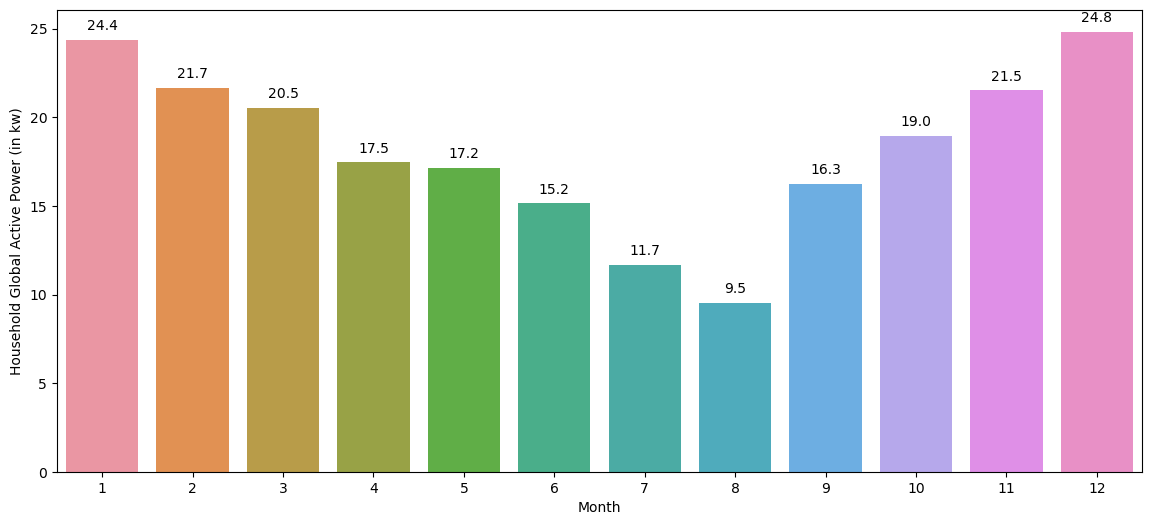

In [64]:
fig, ax = plt.subplots(figsize=(14,6))

barplot = sns.barplot(x=mnth_grp.index, y=mnth_grp.values, ax=ax)

plt.xlabel("Month")
plt.ylabel('Household Global Active Power (in kw)')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')
plt.show()